## Exercise 02 : Bar

In [21]:
import pandas as pd
import sqlite3

database_file = "../data/checking-logs.sqlite"

* analyze only the users and not the admins
* the fontsize and the figsize are still the same
* night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon
is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
* choose a palette that you really enjoy, you do not have to replicate it from the graph
  above

In [22]:
connection_obj = sqlite3.connect(database_file)

In [23]:
query = """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
"""

df = pd.read_sql(query, connection_obj, parse_dates=["timestamp"])

bins = [0, 4, 10, 17, 24]
labels = ["night", "morning", "afternoon", "evening"]

df["daytime"] = pd.cut(
    x=df["timestamp"].dt.hour, bins=bins, labels=labels, right=False
)

df = (
    df.groupby(by=[df["timestamp"].dt.date, "daytime"], observed=True)
    .agg("count")
    .unstack(level="daytime", fill_value=0)
)
df.columns = df.columns.droplevel(0)  # drop the timestamp 0 level
df.index.name = "date" # rename the index column
df

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


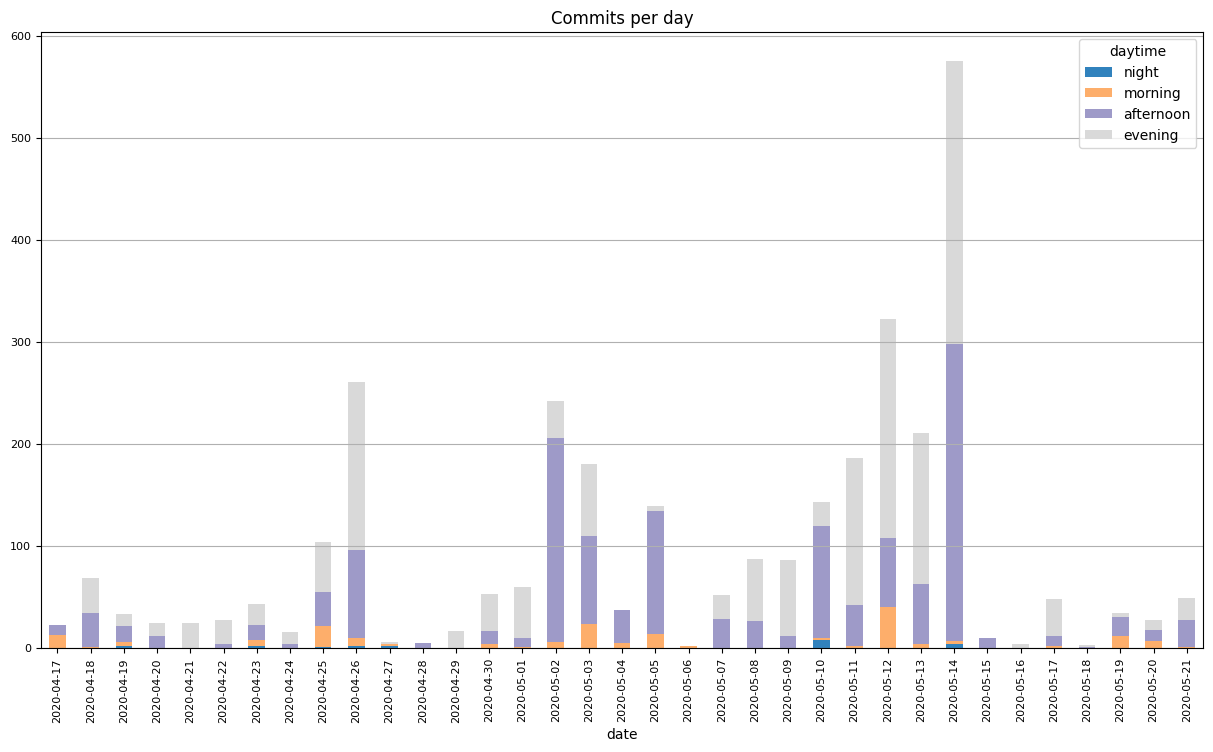

In [24]:
plot = df.plot(
    kind="bar",
    title="Commits per day",
    fontsize=8,
    figsize=(15, 8),
    rot=90,
    stacked=True,
    colormap="tab20c",
)
plot.grid(axis='y')

In [25]:
connection_obj.close()

* at the end of your Jupyter Notebook, create a markdown cell and insert the ques-
  tions:
  * “When do our users usually commit the labs: in the night, morning, afternoon,
  or evening?”, the answer is the two most common periods.
  * Which day has:
    * the most number of commits
    * and at the same time, the number of commits in the evening is higher than in the afternoon?

The answer is the date of that day.

1. The most common commit periods are: afternoon, evening
2. 2020-05-12